In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
figDir = '/group/testa/Project/OvarianAtlas/atlas_project/plots_def/atlas_annotated/'

In [3]:
initDir = '/group/testa/Project/OvarianAtlas/atlas_project/raw_data/atlas_annotated/'

adata = sc.read(initDir + 'atlas_embeddings_cell_labelled.h5ad')

In [4]:
adata

AnnData object with n_obs × n_vars = 1487842 × 17063
    obs: 'tissue', 'developmental_stage', 'treatment', 'recurrence', 'tumor_stage', 'paper_ID', 'anatomical_location', 'dataset', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'CancerMSK', 'EndothelialMSK', 'FibroblastsMSK', 'HematopoieticMSK', 'max', 'cell_types'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'

In [5]:
adata.obs

,tissue,developmental_stage,treatment,recurrence,tumor_stage,paper_ID,anatomical_location,dataset,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,CancerMSK,EndothelialMSK,FibroblastsMSK,HematopoieticMSK,max,cell_types
AAACCTGAGACTTGAA-1-T59,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,Geistlinger,599,599,1302.0,122.0,9.370199,0.573949,0.271034,0.150646,-0.859225,CancerMSK,CancerMSK
AAACCTGAGAGACGAA-1-T59,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,Geistlinger,1198,1198,2977.0,153.0,5.139402,-0.106276,0.598902,1.259536,-1.528241,FibroblastsMSK,vCAF
AAACCTGAGAGTACCG-1-T59,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,Geistlinger,1232,1232,3502.0,203.0,5.796688,0.050084,-0.097049,0.215650,0.589760,HematopoieticMSK,Myeloid_cells
AAACCTGAGTCATCCA-1-T59,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,Geistlinger,550,550,1186.0,66.0,5.564924,0.022695,0.295592,0.405196,-0.798307,FibroblastsMSK,mCAF
AAACCTGAGTGCGATG-1-T59,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,Geistlinger,824,824,2041.0,131.0,6.418423,-0.270711,-0.034378,0.733112,0.627006,FibroblastsMSK,vCAF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SPECTRUM-OV-118_S1_CD45N_PELVIC_PERITONEUM_TTTGTTGCACTTGAAC,Metastasis,Advanced stage,Naive,Unknown,IVB,Vasquez_118,Peritoneum,Vasquez,1875,1875,6163.0,589.0,9.557034,1.097371,-0.007790,-0.188808,-1.295135,CancerMSK,CancerMSK
SPECTRUM-OV-118_S1_CD45N_PELVIC_PERITONEUM_TTTGTTGCAGAAGCGT,Metastasis,Advanced stage,Naive,Unknown,IVB,Vasquez_118,Peritoneum,Vasquez,2156,2156,7669.0,493.0,6.428479,1.355260,-0.087854,0.018302,-1.633444,CancerMSK,CancerMSK
SPECTRUM-OV-118_S1_CD45N_PELVIC_PERITONEUM_TTTGTTGCAGCGTACC,Metastasis,Advanced stage,Naive,Unknown,IVB,Vasquez_118,Peritoneum,Vasquez,2068,2068,6651.0,457.0,6.871148,-0.268423,0.020071,2.131091,-1.186549,FibroblastsMSK,mCAF
SPECTRUM-OV-118_S1_CD45N_PELVIC_PERITONEUM_TTTGTTGTCCCTTCCC,Metastasis,Advanced stage,Naive,Unknown,IVB,Vasquez_118,Peritoneum,Vasquez,3463,3463,15639.0,664.0,4.245796,0.278343,0.115887,1.311216,-1.477107,FibroblastsMSK,iCAF


In [6]:
primary = adata[adata.obs.tissue == 'Primary']
primary

View of AnnData object with n_obs × n_vars = 512237 × 17063
    obs: 'tissue', 'developmental_stage', 'treatment', 'recurrence', 'tumor_stage', 'paper_ID', 'anatomical_location', 'dataset', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'CancerMSK', 'EndothelialMSK', 'FibroblastsMSK', 'HematopoieticMSK', 'max', 'cell_types'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'

/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


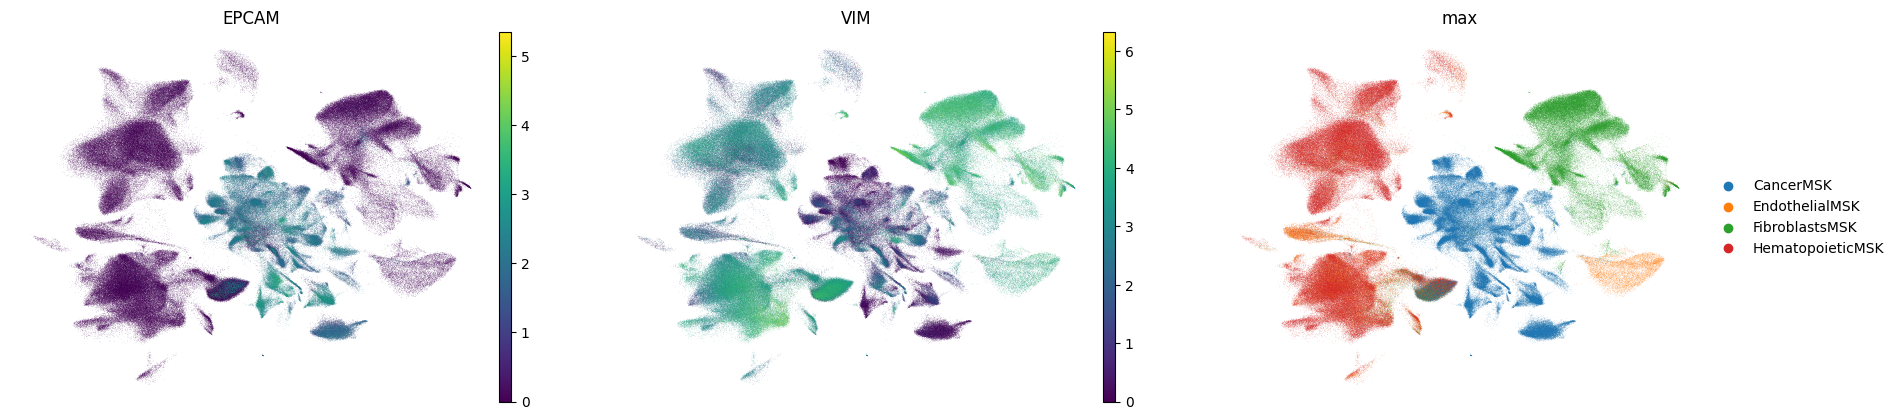

In [10]:
sc.pl.umap(primary, color=['EPCAM', 'VIM', 'max'], frameon=False)

In [8]:
ascites = adata[adata.obs.tissue == 'Ascites']
ascites

View of AnnData object with n_obs × n_vars = 153605 × 17063
    obs: 'tissue', 'developmental_stage', 'treatment', 'recurrence', 'tumor_stage', 'paper_ID', 'anatomical_location', 'dataset', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'CancerMSK', 'EndothelialMSK', 'FibroblastsMSK', 'HematopoieticMSK', 'max', 'cell_types'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'

In [15]:
ascites.obs.paper_ID.unique()

['Loret_1', 'Loret_2', 'Loret_3', 'Ren_1', 'Vasquez_107', ..., 'Vasquez_024', 'Vasquez_022', 'Vasquez_009', 'Vasquez_007', 'Vasquez_116']
Length: 29
Categories (29, object): ['Loret_1', 'Loret_2', 'Loret_3', 'Ren_1', ..., 'Vasquez_105', 'Vasquez_107', 'Vasquez_112', 'Vasquez_116']

/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


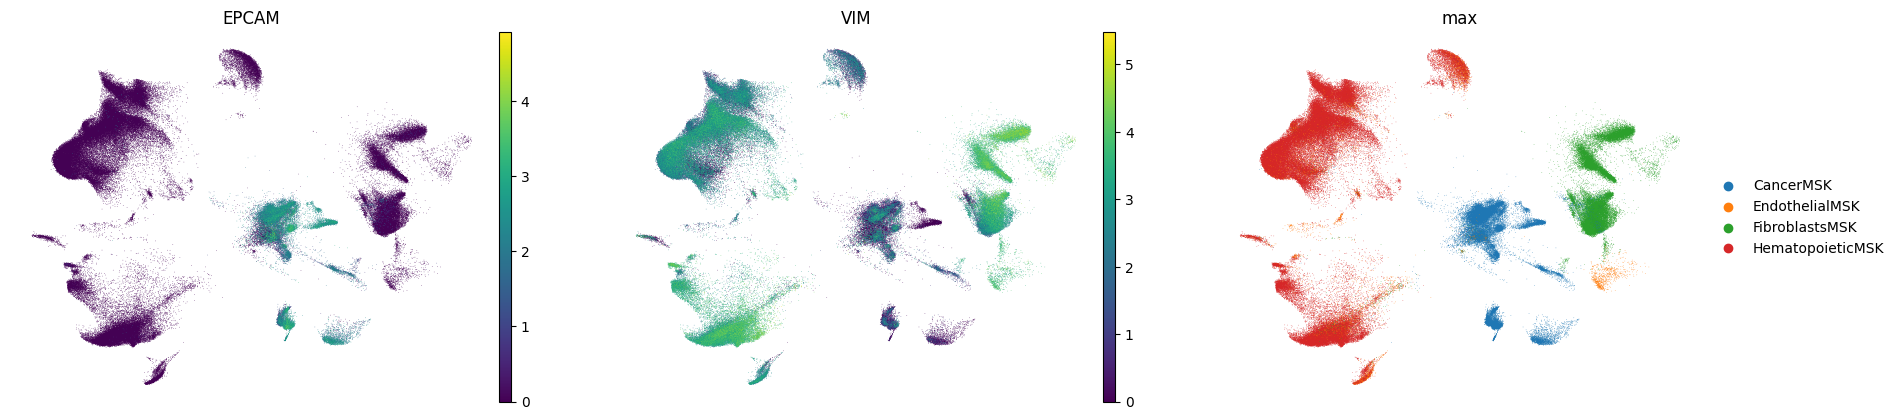

In [11]:
sc.pl.umap(ascites, color=['EPCAM', 'VIM', 'max'], frameon=False)

In [12]:
metastasis = adata[adata.obs.tissue == 'Metastasis']
metastasis

View of AnnData object with n_obs × n_vars = 822000 × 17063
    obs: 'tissue', 'developmental_stage', 'treatment', 'recurrence', 'tumor_stage', 'paper_ID', 'anatomical_location', 'dataset', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'CancerMSK', 'EndothelialMSK', 'FibroblastsMSK', 'HematopoieticMSK', 'max', 'cell_types'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'

In [14]:
metastasis.obs.paper_ID.unique()

['Geistlinger_59', 'Geistlinger_76', 'Geistlinger_77', 'Geistlinger_89', 'Geistlinger_90', ..., 'Vasquez_026', 'Vasquez_022', 'Vasquez_007', 'Vasquez_116', 'Vasquez_118']
Length: 68
Categories (68, object): ['Geistlinger_59', 'Geistlinger_76', 'Geistlinger_77', 'Geistlinger_89', ..., 'Zhang_443', 'Zhang_540', 'Zhang_733', 'Zhang_1005']

/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


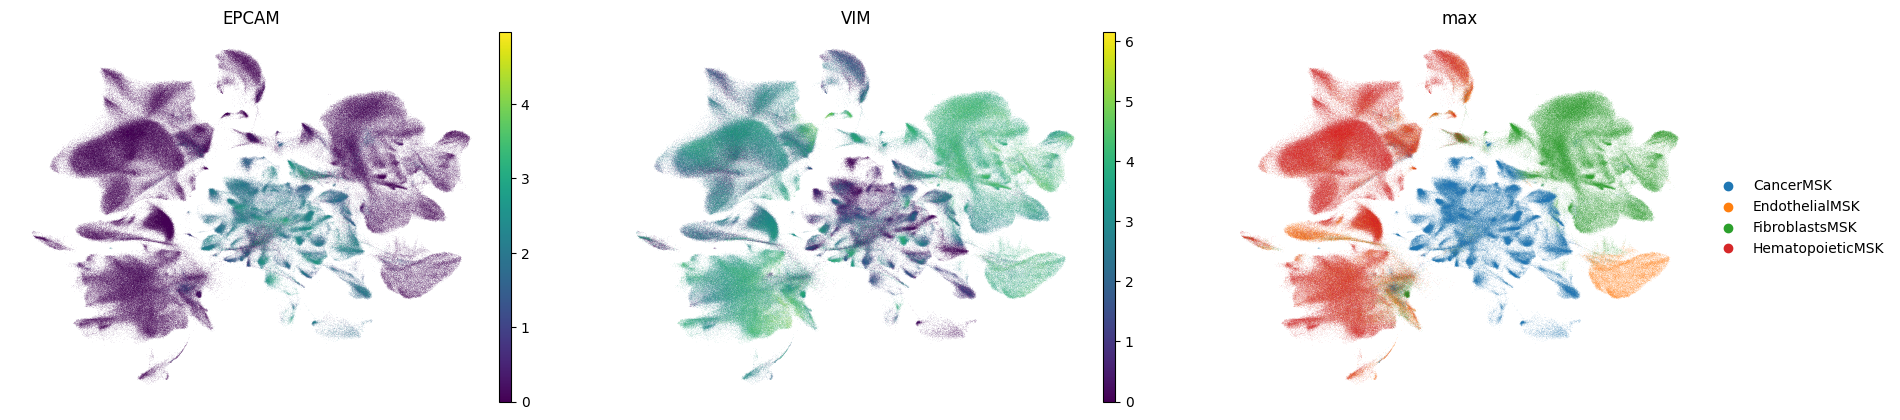

In [13]:
sc.pl.umap(metastasis, color=['EPCAM', 'VIM', 'max'], frameon=False)

In [5]:
df = pd.crosstab(adata.obs['dataset'], adata.obs['tissue'])
df

tissue,Ascites,Metastasis,Primary
dataset,,,
Geistlinger,0,50733,0
Loret,23086,47538,34347
Olbrecht,0,9641,1743
Qian,0,6578,0
Regner,0,0,14289
Ren,7364,0,7429
Vasquez,123155,655809,424849
Xu,0,0,29580
Zhang,0,51701,0


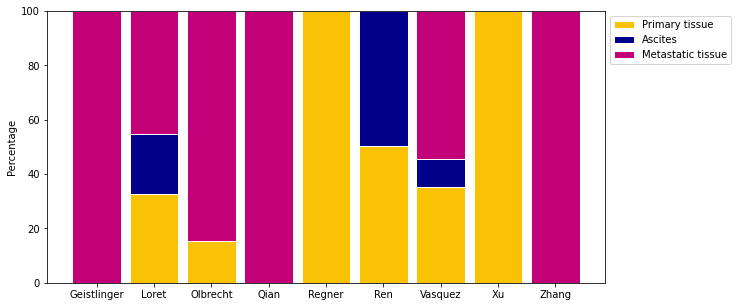

In [6]:
totals = df.sum(axis=1)

# Calculate percentages for each cell type
cell_type1_percent = df['Primary'] / totals * 100
cell_type2_percent = df['Ascites'] / totals * 100
cell_type3_percent = df['Metastasis'] / totals * 100

# Plotting
barWidth = 0.85
r = range(len(df))

# Set figure dimensions
plt.figure(figsize=(10, 5))

# Create stacked bars
plt.bar(r, cell_type1_percent, color='#FAC205', edgecolor='white', width=barWidth, label='Primary tissue')
plt.bar(r, cell_type2_percent, bottom=cell_type1_percent, color='#00008B', edgecolor='white', width=barWidth, label='Ascites')
plt.bar(r, cell_type3_percent, bottom=cell_type1_percent+cell_type2_percent, color='#C20078', edgecolor='white', width=barWidth, label='Metastatic tissue')


# Custom x axis
plt.xticks(r, df.reset_index().dataset)
#plt.xlabel("Dataset")
plt.ylabel("Percentage")

# Show legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

# Save plot
plt.savefig(figDir + 'tissues_across_datasets.pdf', format='pdf', bbox_inches='tight')

# Show plot
plt.show()

In [7]:
df = pd.crosstab(adata.obs['dataset'], adata.obs['treatment'])
df

treatment,CHT,NACT,Naive
dataset,,,
Geistlinger,50733,0,0
Loret,0,54710,50261
Olbrecht,0,0,11384
Qian,0,0,6578
Regner,0,0,14289
Ren,14793,0,0
Vasquez,0,0,1203813
Xu,0,0,29580
Zhang,0,30001,21700


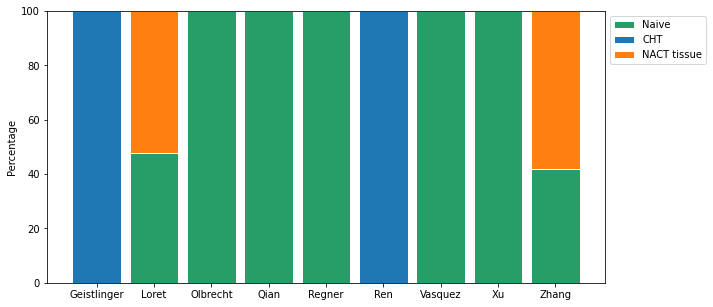

In [8]:
totals = df.sum(axis=1)

# Calculate percentages for each cell type
cell_type1_percent = df['Naive'] / totals * 100
cell_type2_percent = df['CHT'] / totals * 100
cell_type3_percent = df['NACT'] / totals * 100

# Plotting
barWidth = 0.85
r = range(len(df))

# Set figure dimensions
plt.figure(figsize=(10, 5))

# Create stacked bars
plt.bar(r, cell_type1_percent, color='#279e68', edgecolor='white', width=barWidth, label='Naive')
plt.bar(r, cell_type2_percent, bottom=cell_type1_percent, color='#1f77b4', edgecolor='white', width=barWidth, label='CHT')
plt.bar(r, cell_type3_percent, bottom=cell_type1_percent+cell_type2_percent, color='#ff800e', edgecolor='white', width=barWidth, label='NACT tissue')


# Custom x axis
plt.xticks(r, df.reset_index().dataset)
#plt.xlabel("Dataset")
plt.ylabel("Percentage")

# Show legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

# Save plot
plt.savefig(figDir + 'treatment_across_datasets.pdf', format='pdf', bbox_inches='tight')

# Show plot
plt.show()

In [5]:
df = pd.crosstab(adata.obs['dataset'], adata.obs['max'])
df

max,CancerMSK,EndothelialMSK,FibroblastsMSK,HematopoieticMSK
dataset,,,,
Geistlinger,18071,5018,17748,9896
Loret,34730,5821,62698,1722
Olbrecht,4503,1191,4698,992
Qian,2193,560,2434,1391
Regner,6536,1958,3675,2120
Ren,6605,1046,339,6803
Vasquez,311094,114214,217303,561202
Xu,6604,3631,2824,16521
Zhang,10770,13915,9577,17439


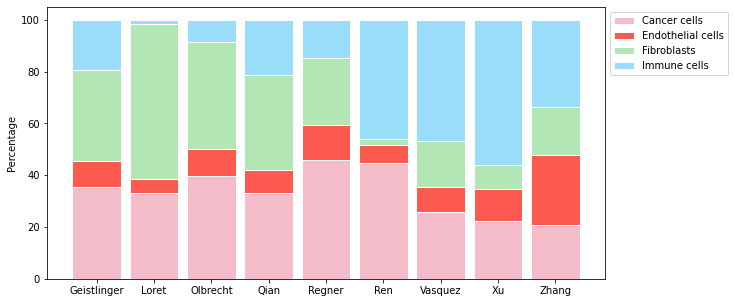

In [6]:
totals = df.sum(axis=1)

# Calculate percentages for each cell type
cell_type1_percent = df['CancerMSK'] / totals * 100
cell_type2_percent = df['EndothelialMSK'] / totals * 100
cell_type3_percent = df['FibroblastsMSK'] / totals * 100
cell_type4_percent = df['HematopoieticMSK'] / totals * 100

# Plotting
barWidth = 0.85
r = range(len(df))

# Set figure dimensions
plt.figure(figsize=(10, 5))

# Create stacked bars
plt.bar(r, cell_type1_percent, color='#F4BBC9', edgecolor='white', width=barWidth, label='Cancer cells')
plt.bar(r, cell_type2_percent, bottom=cell_type1_percent, color='#FC5A50', edgecolor='white', width=barWidth, label='Endothelial cells')
plt.bar(r, cell_type3_percent, bottom=cell_type1_percent+cell_type2_percent, color='#B3E6B5', edgecolor='white', width=barWidth, label='Fibroblasts')
plt.bar(r, cell_type4_percent, bottom=cell_type1_percent+cell_type2_percent+cell_type3_percent, color='#9addfb', edgecolor='white', width=barWidth, label='Immune cells')

# Custom x axis
plt.xticks(r, df.reset_index().dataset)
#plt.xlabel("Dataset")
plt.ylabel("Percentage")

# Show legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

# Save plot
plt.savefig(figDir + 'celltypes_across_datasets.pdf', format='pdf', bbox_inches='tight')

# Show plot
plt.show()

In [30]:
tab1 = pd.DataFrame(adata.obs.tissue.value_counts())

In [31]:
tab1

,tissue
Metastasis,822000
Primary,512237
Ascites,153605


In [32]:
tab1.index.astype('object')

Index(['Metastasis', 'Primary', 'Ascites'], dtype='object')

In [33]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Avenir'

In [34]:
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'

In [35]:
my_range=list(range(1,len(tab1.index)+1))

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


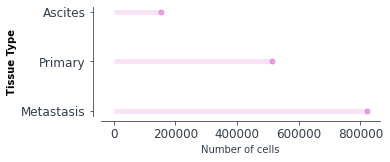

In [36]:
fig, ax = plt.subplots(figsize=(5,2))

# create for each expense type an horizontal line that starts at x = 0 with the length 
# represented by the specific expense percentage value.
plt.hlines(y=my_range, xmin=0, xmax=tab1['tissue'], color='orchid', alpha=0.2, linewidth=5)

# create for each expense type a dot at the level of the expense percentage value
plt.plot(tab1['tissue'], my_range, "o", markersize=5, color='orchid', alpha=0.6)

# set labels style
ax.set_xlabel('Number of cells', fontsize=10, color = '#333F4B')
ax.set_ylabel('Tissue Type', fontweight='black')

# # set axis
ax.tick_params(axis='both', which='major', labelsize=12)
plt.yticks(my_range, tab1.index)

# add an horizonal label for the y axis 
# fig.text(-0.23, 0.96, 'Tissue Type', fontsize=15, fontweight='black', color = '#333F4B')

# # change the style of the axis spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# ax.spines['left'].set_bounds((1, len(my_range)))
# ax.set_xlim(0,25)

ax.spines['left'].set_position(('outward', 8))
ax.spines['bottom'].set_position(('outward', 5))

plt.savefig(figDir + 'hist_tissue.pdf', format='pdf', bbox_inches='tight')

In [37]:
tab2 = pd.DataFrame(adata.obs.treatment.value_counts())

In [38]:
tab2

,treatment
Naive,1337605
NACT,84711
CHT,65526


In [39]:
tab2.index.astype('object')

Index(['Naive', 'NACT', 'CHT'], dtype='object')

In [40]:
my_range=list(range(1,len(tab2.index)+1))

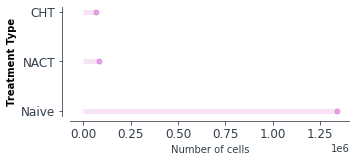

In [41]:
fig, ax = plt.subplots(figsize=(5,2))

# create for each expense type an horizontal line that starts at x = 0 with the length 
# represented by the specific expense percentage value.
plt.hlines(y=my_range, xmin=0, xmax=tab2['treatment'], color='orchid', alpha=0.2, linewidth=5)

# create for each expense type a dot at the level of the expense percentage value
plt.plot(tab2['treatment'], my_range, "o", markersize=5, color='orchid', alpha=0.6)

# set labels style
ax.set_xlabel('Number of cells', fontsize=10, color = '#333F4B')
ax.set_ylabel('Treatment Type', fontweight='black')

# # set axis
ax.tick_params(axis='both', which='major', labelsize=12)
plt.yticks(my_range, tab2.index)

# add an horizonal label for the y axis 
# fig.text(-0.23, 0.96, 'Tissue Type', fontsize=15, fontweight='black', color = '#333F4B')

# # change the style of the axis spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# ax.spines['left'].set_bounds((1, len(my_range)))
# ax.set_xlim(0,25)

ax.spines['left'].set_position(('outward', 8))
ax.spines['bottom'].set_position(('outward', 5))

plt.savefig(figDir + 'hist_treatment.pdf', format='pdf', bbox_inches='tight')

In [7]:
adata_m = adata[(adata.obs['tissue'] == 'Metastasis')]

In [8]:
tab3 = pd.DataFrame(adata_m.obs.anatomical_location.value_counts())

In [9]:
tab3

,anatomical_location
Omentum,393678
Peritoneum,176350
Bowel,111379
Other,78559
Upper_quadrant,42413
Urinary_bladder,10252
Mesentery,8084
Tumor,1285


In [10]:
tab3.index.astype('object')

Index(['Omentum', 'Peritoneum', 'Bowel', 'Other', 'Upper_quadrant',
       'Urinary_bladder', 'Mesentery', 'Tumor'],
      dtype='object')

In [11]:
my_range=list(range(1,len(tab3.index)+1))

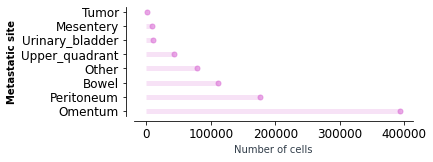

In [12]:
fig, ax = plt.subplots(figsize=(5,2))

# create for each expense type an horizontal line that starts at x = 0 with the length 
# represented by the specific expense percentage value.
plt.hlines(y=my_range, xmin=0, xmax=tab3['anatomical_location'], color='orchid', alpha=0.2, linewidth=5)

# create for each expense type a dot at the level of the expense percentage value
plt.plot(tab3['anatomical_location'], my_range, "o", markersize=5, color='orchid', alpha=0.6)

# set labels style
ax.set_xlabel('Number of cells', fontsize=10, color = '#333F4B')
ax.set_ylabel('Metastatic site', fontweight='black')

# # set axis
ax.tick_params(axis='both', which='major', labelsize=12)
plt.yticks(my_range, tab3.index)

# add an horizonal label for the y axis 
# fig.text(-0.23, 0.96, 'Tissue Type', fontsize=15, fontweight='black', color = '#333F4B')

# # change the style of the axis spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# ax.spines['left'].set_bounds((1, len(my_range)))
# ax.set_xlim(0,25)

ax.spines['left'].set_position(('outward', 8))
ax.spines['bottom'].set_position(('outward', 5))

plt.savefig(figDir + 'hist_anatomical_loc.pdf', format='pdf', bbox_inches='tight')

In [47]:
tab4 = pd.DataFrame(adata.obs.tumor_stage.value_counts())

In [48]:
tab4

,tumor_stage
IIIC,654702
IVB,637624
IVA,75515
IIIB,63558
IV,21145
IIB,17135
IC,11923
SPECTRUM-OV-028,6240


In [49]:
adata.obs['tumor_stage'] = adata.obs['tumor_stage'].replace({'SPECTRUM-OV-028': 'Unknown'})

In [50]:
tab4 = pd.DataFrame(adata.obs.tumor_stage.value_counts())

In [51]:
tab4

,tumor_stage
IIIC,654702
IVB,637624
IVA,75515
IIIB,63558
IV,21145
IIB,17135
IC,11923
Unknown,6240


In [52]:
tab4.index.astype('object')

Index(['IIIC', 'IVB', 'IVA', 'IIIB', 'IV', 'IIB', 'IC', 'Unknown'], dtype='object')

In [53]:
my_range=list(range(1,len(tab4.index)+1))

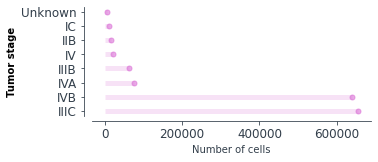

In [54]:
fig, ax = plt.subplots(figsize=(5,2))

# create for each expense type an horizontal line that starts at x = 0 with the length 
# represented by the specific expense percentage value.
plt.hlines(y=my_range, xmin=0, xmax=tab4['tumor_stage'], color='orchid', alpha=0.2, linewidth=5)

# create for each expense type a dot at the level of the expense percentage value
plt.plot(tab4['tumor_stage'], my_range, "o", markersize=5, color='orchid', alpha=0.6)

# set labels style
ax.set_xlabel('Number of cells', fontsize=10, color = '#333F4B')
ax.set_ylabel('Tumor stage', fontweight='black')

# # set axis
ax.tick_params(axis='both', which='major', labelsize=12)
plt.yticks(my_range, tab4.index)

# add an horizonal label for the y axis 
# fig.text(-0.23, 0.96, 'Tissue Type', fontsize=15, fontweight='black', color = '#333F4B')

# # change the style of the axis spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# ax.spines['left'].set_bounds((1, len(my_range)))
# ax.set_xlim(0,25)

ax.spines['left'].set_position(('outward', 8))
ax.spines['bottom'].set_position(('outward', 5))

plt.savefig(figDir + 'hist_tumor_stage.pdf', format='pdf', bbox_inches='tight')

In [55]:
tab5 = pd.DataFrame(adata.obs.recurrence.value_counts())

In [56]:
tab5

,recurrence
Unknown,1224680
Recurrence,167477
Sensitive,95685


In [57]:
tab5.index.astype('object')

Index(['Unknown', 'Recurrence', 'Sensitive'], dtype='object')

In [58]:
my_range=list(range(1,len(tab5.index)+1))

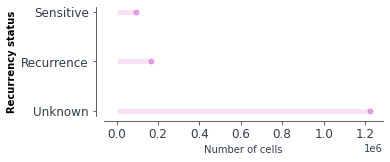

In [59]:
fig, ax = plt.subplots(figsize=(5,2))

# create for each expense type an horizontal line that starts at x = 0 with the length 
# represented by the specific expense percentage value.
plt.hlines(y=my_range, xmin=0, xmax=tab5['recurrence'], color='orchid', alpha=0.2, linewidth=5)

# create for each expense type a dot at the level of the expense percentage value
plt.plot(tab5['recurrence'], my_range, "o", markersize=5, color='orchid', alpha=0.6)

# set labels style
ax.set_xlabel('Number of cells', fontsize=10, color = '#333F4B')
ax.set_ylabel('Recurrency status', fontweight='black')

# # set axis
ax.tick_params(axis='both', which='major', labelsize=12)
plt.yticks(my_range, tab5.index)

# add an horizonal label for the y axis 
# fig.text(-0.23, 0.96, 'Tissue Type', fontsize=15, fontweight='black', color = '#333F4B')

# # change the style of the axis spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# ax.spines['left'].set_bounds((1, len(my_range)))
# ax.set_xlim(0,25)

ax.spines['left'].set_position(('outward', 8))
ax.spines['bottom'].set_position(('outward', 5))

plt.savefig(figDir + 'hist_recurrence.pdf', format='pdf', bbox_inches='tight')

In [60]:
tab6 = pd.DataFrame(adata.obs.dataset.value_counts())

In [61]:
tab6

,dataset
Vasquez,1203813
Loret,104971
Zhang,51701
Geistlinger,50733
Xu,29580
Ren,14793
Regner,14289
Olbrecht,11384
Qian,6578


In [62]:
tab6.index.astype('object')

Index(['Vasquez', 'Loret', 'Zhang', 'Geistlinger', 'Xu', 'Ren', 'Regner',
       'Olbrecht', 'Qian'],
      dtype='object')

In [63]:
my_range=list(range(1,len(tab6.index)+1))

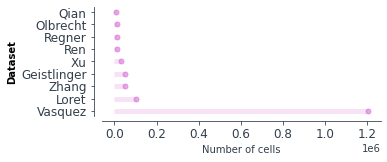

In [64]:
fig, ax = plt.subplots(figsize=(5,2))

# create for each expense type an horizontal line that starts at x = 0 with the length 
# represented by the specific expense percentage value.
plt.hlines(y=my_range, xmin=0, xmax=tab6['dataset'], color='orchid', alpha=0.2, linewidth=5)

# create for each expense type a dot at the level of the expense percentage value
plt.plot(tab6['dataset'], my_range, "o", markersize=5, color='orchid', alpha=0.6)

# set labels style
ax.set_xlabel('Number of cells', fontsize=10, color = '#333F4B')
ax.set_ylabel('Dataset', fontweight='black')

# # set axis
ax.tick_params(axis='both', which='major', labelsize=12)
plt.yticks(my_range, tab6.index)

# add an horizonal label for the y axis 
# fig.text(-0.23, 0.96, 'Tissue Type', fontsize=15, fontweight='black', color = '#333F4B')

# # change the style of the axis spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# ax.spines['left'].set_bounds((1, len(my_range)))
# ax.set_xlim(0,25)

ax.spines['left'].set_position(('outward', 8))
ax.spines['bottom'].set_position(('outward', 5))

plt.savefig(figDir + 'hist_dataset.pdf', format='pdf', bbox_inches='tight')

In [14]:
tab7 = pd.DataFrame(adata.obs['max'].value_counts())

In [15]:
tab7

,max
HematopoieticMSK,618086
CancerMSK,401106
FibroblastsMSK,321296
EndothelialMSK,147354


In [16]:
tab7.index.astype('object')

Index(['HematopoieticMSK', 'CancerMSK', 'FibroblastsMSK', 'EndothelialMSK'], dtype='object')

In [17]:
my_range=list(range(1,len(tab7.index)+1))

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


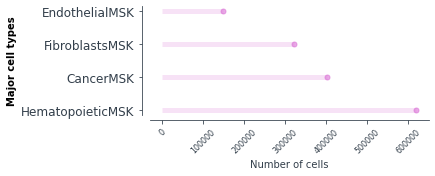

In [69]:
fig, ax = plt.subplots(figsize=(5,2))

# create for each expense type an horizontal line that starts at x = 0 with the length 
# represented by the specific expense percentage value.
plt.hlines(y=my_range, xmin=0, xmax=tab7['max'], color='orchid', alpha=0.2, linewidth=5)

# create for each expense type a dot at the level of the expense percentage value
plt.plot(tab7['max'], my_range, "o", markersize=5, color='orchid', alpha=0.6)

# set labels style
ax.set_xlabel('Number of cells', fontsize=10, color = '#333F4B')
ax.set_ylabel('Major cell types', fontweight='black')

# # set axis
ax.tick_params(axis='both', which='major', labelsize=12)
plt.yticks(my_range, tab7.index)

# add an horizonal label for the y axis 
# fig.text(-0.23, 0.96, 'Tissue Type', fontsize=15, fontweight='black', color = '#333F4B')

# # change the style of the axis spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# ax.spines['left'].set_bounds((1, len(my_range)))
# ax.set_xlim(0,25)

ax.spines['left'].set_position(('outward', 8))
ax.spines['bottom'].set_position(('outward', 5))

plt.xticks(rotation=45, fontsize=8)

plt.savefig(figDir + 'hist_celltypes.pdf', format='pdf', bbox_inches='tight')

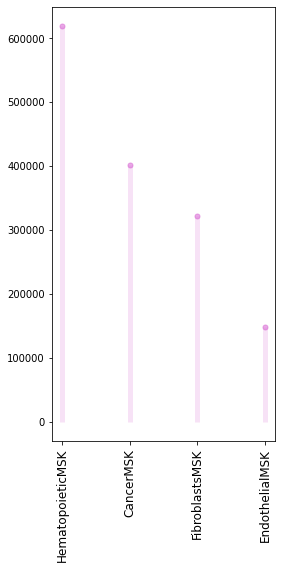

In [27]:
#fig, ax = plt.subplots(figsize=(5,2))

# Set figure dimensions
plt.figure(figsize=(4, 8))

# Create for each cell type a horizontal line that starts at x = 0 with the length 
# represented by the specific number of cells.
plt.vlines(x=tab7.index, ymin=0, ymax=tab7['max'], color='orchid', alpha=0.2, linewidth=5)

# Create for each cell type a dot at the level of the number of cells
plt.plot(tab7.index, tab7['max'], "o", markersize=5, color='orchid', alpha=0.6)

# Set labels style
ax.set_xlabel('Number of cells', fontsize=10, color='#333F4B')
ax.set_ylabel('Major cell types', fontweight='black')

# Set axis
ax.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(rotation=90, fontsize=12)

# Change the style of the axis spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_position(('outward', 8))
ax.spines['bottom'].set_position(('outward', 5))

plt.savefig(figDir + 'hist_celltypes.pdf', format='pdf', bbox_inches='tight')
plt.show()

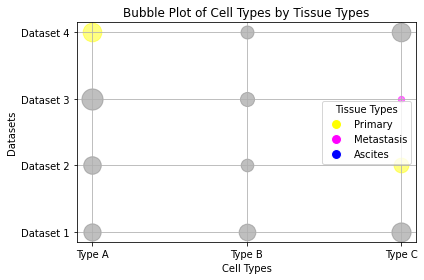

In [5]:
# Sample data (replace this with your actual data)
datasets = ['Dataset 1', 'Dataset 2', 'Dataset 3', 'Dataset 4']
cell_types = ['Type A', 'Type B', 'Type C']
tissue_types = {'Primary': 'yellow', 'Metastasis': 'magenta', 'Ascites': 'blue'}

# Sample data for cell counts (replace this with your actual data)
cell_counts = {
    'Dataset 1': {'Type A': {'Primary': 20, 'Metastasis': 10},
                  'Type B': {'Primary': 15, 'Metastasis': 5, 'Ascites': 8},
                  'Type C': {'Primary': 25, 'Ascites': 12}},
    'Dataset 2': {'Type A': {'Primary': 18, 'Metastasis': 8, 'Ascites': 5},
                  'Type B': {'Metastasis': 6, 'Ascites': 10},
                  'Type C': {'Primary': 22}},
    'Dataset 3': {'Type A': {'Primary': 30, 'Metastasis': 15},
                  'Type B': {'Primary': 12, 'Ascites': 8},
                  'Type C': {'Metastasis': 4}},
    'Dataset 4': {'Type A': {'Primary': 35},
                  'Type B': {'Metastasis': 7, 'Ascites': 10},
                  'Type C': {'Primary': 20, 'Ascites': 15}}
}

# Plotting
fig, ax = plt.subplots()

for i, dataset in enumerate(datasets):
    for j, cell_type in enumerate(cell_types):
        bubble_sizes = []
        bubble_colors = []
        for tissue_type, color in tissue_types.items():
            if tissue_type in cell_counts[dataset][cell_type]:
                bubble_sizes.append(cell_counts[dataset][cell_type][tissue_type])
                bubble_colors.append(color)
        if bubble_sizes:
            bubble_size = sum(bubble_sizes)
            bubble_color = bubble_colors[0] if len(set(bubble_colors)) == 1 else 'grey'  # 'grey' for mixed colors
            ax.scatter(j, i, s=bubble_size * 10, color=bubble_color, alpha=0.5)

ax.set_xticks(range(len(cell_types)))
ax.set_xticklabels(cell_types)
ax.set_yticks(range(len(datasets)))
ax.set_yticklabels(datasets)
ax.set_xlabel('Cell Types')
ax.set_ylabel('Datasets')

plt.title('Bubble Plot of Cell Types by Tissue Types')
plt.grid(True)

# Creating a legend for the bubble colors
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=tissue)
                   for tissue, color in tissue_types.items()]
plt.legend(handles=legend_elements, title='Tissue Types')

plt.tight_layout()
plt.show()


In [13]:
df_max = pd.crosstab(adata.obs['dataset'], adata.obs['max'])
df_max

max,CancerMSK,EndothelialMSK,FibroblastsMSK,HematopoieticMSK
dataset,,,,
Geistlinger,18071,5018,17748,9896
Loret,34730,5821,62698,1722
Olbrecht,4503,1191,4698,992
Qian,2193,560,2434,1391
Regner,6536,1958,3675,2120
Ren,6605,1046,339,6803
Vasquez,311094,114214,217303,561202
Xu,6604,3631,2824,16521
Zhang,10770,13915,9577,17439


In [14]:
df_tissue = pd.crosstab(adata.obs['dataset'], adata.obs['tissue'])
df_tissue

tissue,Ascites,Metastasis,Primary
dataset,,,
Geistlinger,0,50733,0
Loret,23086,47538,34347
Olbrecht,0,9641,1743
Qian,0,6578,0
Regner,0,0,14289
Ren,7364,0,7429
Vasquez,123155,655809,424849
Xu,0,0,29580
Zhang,0,51701,0


In [15]:
df_max.index.get_level_values('dataset').unique()

CategoricalIndex(['Geistlinger', 'Loret', 'Olbrecht', 'Qian', 'Regner', 'Ren',
                  'Vasquez', 'Xu', 'Zhang'],
                 categories=['Geistlinger', 'Loret', 'Olbrecht', 'Qian', 'Regner', 'Ren', 'Vasquez', 'Xu', ...], ordered=False, dtype='category', name='dataset')

ValueError: No axis named 1 for object type Series

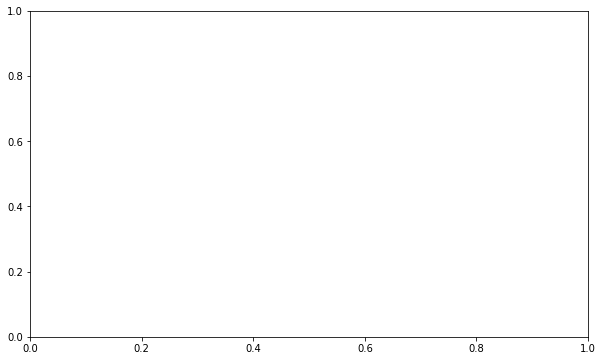

In [16]:

# Extracting the dataset names
datasets = df_max.index.get_level_values('dataset').unique()

# Calculate the total counts for each dataset
total_cell_counts = df_max.sum(axis=1)
total_tissue_counts = df_tissue.sum(axis=0)

# Define bar width
bar_width = 0.35

# Define the x-axis positions for bars
r1 = np.arange(len(datasets))
r2 = [x + bar_width for x in r1]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting bars for cell types
cell_bars = ax.bar(r1, total_cell_counts.sum(axis=1), color='b', width=bar_width, label='Cell Types')

# Plotting bars for tissue types
tissue_bars = ax.bar(r2, total_tissue_counts.sum(axis=1), color='r', width=bar_width, label='Tissue Types')

# Customizing the plot
ax.set_xlabel('Dataset')
ax.set_ylabel('Total Counts')
ax.set_title('Total Counts of Cell Types and Tissue Types by Dataset')
ax.set_xticks([r + bar_width / 2 for r in range(len(datasets))])
ax.set_xticklabels(datasets, rotation=45, ha='right')
ax.legend()

# Function to add labels on top of the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add labels for cell bars
add_labels(cell_bars)

# Add labels for tissue bars
add_labels(tissue_bars)

# Show plot
plt.tight_layout()
plt.show()


ValueError: shape mismatch: objects cannot be broadcast to a single shape

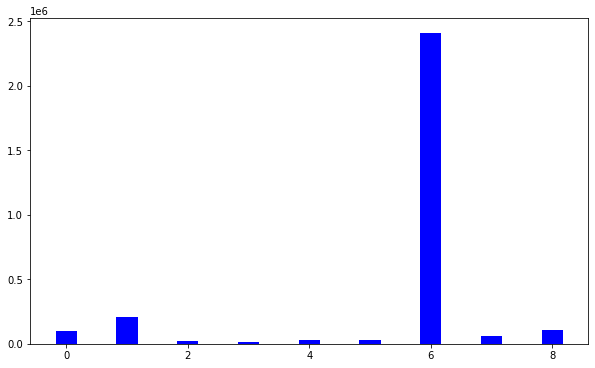

In [17]:
# Assuming you have df_max and df_tissue DataFrames with counts for cell types and tissue types respectively
# Merging the two DataFrames based on the 'dataset' index
merged_df = pd.merge(df_max, df_tissue, on='dataset')

# Extracting the dataset names
datasets = merged_df.index

# Define bar width
bar_width = 0.35

# Define the x-axis positions for bars
r1 = np.arange(len(datasets))
r2 = [x + bar_width for x in r1]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting bars for cell types
cell_bars = ax.bar(r1, merged_df.sum(axis=1), color='b', width=bar_width, label='Cell Types')

# Plotting bars for tissue types
tissue_bars = ax.bar(r2, merged_df.sum(axis=0), color='r', width=bar_width, label='Tissue Types')

# Customizing the plot
ax.set_xlabel('Dataset')
ax.set_ylabel('Total Counts')
ax.set_title('Total Counts of Cell Types and Tissue Types by Dataset')
ax.set_xticks([r + bar_width / 2 for r in range(len(datasets))])
ax.set_xticklabels(datasets, rotation=45, ha='right')
ax.legend()

# Function to add labels on top of the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add labels for cell bars
add_labels(cell_bars)

# Add labels for tissue bars
add_labels(tissue_bars)

# Show plot
plt.tight_layout()
plt.show()


In [18]:
merged_df

,CancerMSK,EndothelialMSK,FibroblastsMSK,HematopoieticMSK,Ascites,Metastasis,Primary
dataset,,,,,,,
Geistlinger,18071,5018,17748,9896,0,50733,0
Loret,34730,5821,62698,1722,23086,47538,34347
Olbrecht,4503,1191,4698,992,0,9641,1743
Qian,2193,560,2434,1391,0,6578,0
Regner,6536,1958,3675,2120,0,0,14289
Ren,6605,1046,339,6803,7364,0,7429
Vasquez,311094,114214,217303,561202,123155,655809,424849
Xu,6604,3631,2824,16521,0,0,29580
Zhang,10770,13915,9577,17439,0,51701,0


In [19]:
print("Cell types shape:", merged_df.sum(axis=1).shape)
print("Tissue types shape:", merged_df.sum(axis=0).shape)

Cell types shape: (9,)
Tissue types shape: (7,)


In [20]:
print("Index values of df_max:", df_max.index)
print("Index values of df_tissue:", df_tissue.index)

Index values of df_max: CategoricalIndex(['Geistlinger', 'Loret', 'Olbrecht', 'Qian', 'Regner', 'Ren',
                  'Vasquez', 'Xu', 'Zhang'],
                 categories=['Geistlinger', 'Loret', 'Olbrecht', 'Qian', 'Regner', 'Ren', 'Vasquez', 'Xu', ...], ordered=False, dtype='category', name='dataset')
Index values of df_tissue: CategoricalIndex(['Geistlinger', 'Loret', 'Olbrecht', 'Qian', 'Regner', 'Ren',
                  'Vasquez', 'Xu', 'Zhang'],
                 categories=['Geistlinger', 'Loret', 'Olbrecht', 'Qian', 'Regner', 'Ren', 'Vasquez', 'Xu', ...], ordered=False, dtype='category', name='dataset')


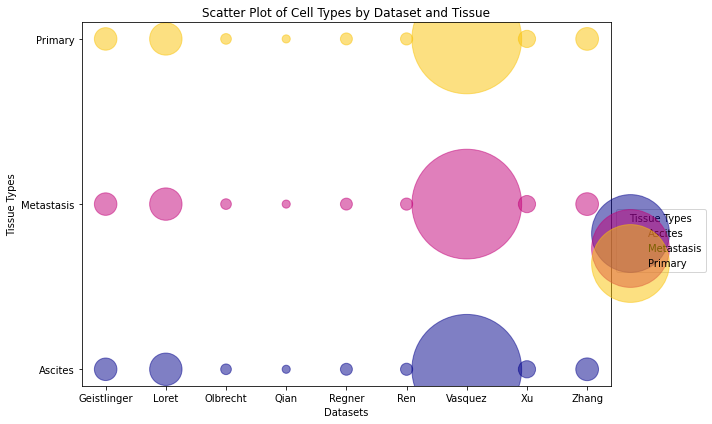

In [24]:
# Sample data (replace this with your actual DataFrame)
data = {
    'CancerMSK': [18071, 34730, 4503, 2193, 6536, 6605, 311094, 6604, 10770],
    'EndothelialMSK': [5018, 5821, 1191, 560, 1958, 1046, 114214, 3631, 13915],
    'FibroblastsMSK': [17748, 62698, 4698, 2434, 3675, 339, 217303, 2824, 9577],
    'HematopoieticMSK': [9896, 1722, 992, 1391, 2120, 6803, 561202, 16521, 17439],
    'Ascites': [0, 23086, 0, 0, 0, 7364, 123155, 0, 0],
    'Metastasis': [50733, 47538, 9641, 6578, 0, 0, 655809, 0, 51701],
    'Primary': [0, 34347, 1743, 0, 14289, 7429, 424849, 29580, 0]
}
index = ['Geistlinger', 'Loret', 'Olbrecht', 'Qian', 'Regner', 'Ren', 'Vasquez', 'Xu', 'Zhang']

# Create DataFrame
df = pd.DataFrame(data, index=index)

# Define colors for tissue types
tissue_colors = {'Ascites': '#00008B', 'Metastasis': '#C20078', 'Primary': '#FAC205'}

# Define marker sizes based on the number of cells (scaling factor applied)
scaling_factor = 0.005  # Adjust this as needed
marker_sizes = df.sum(axis=1) * scaling_factor

# Create the scatter plot
fig, ax = plt.subplots(figsize=(10, 6))

for tissue, color in tissue_colors.items():
    ax.scatter(df.index, [tissue] * len(df), s=marker_sizes, c=color, label=tissue, alpha=0.5)

# Customize the plot
ax.set_xlabel('Datasets')
ax.set_ylabel('Tissue Types')
ax.set_title('Scatter Plot of Cell Types by Dataset and Tissue')
ax.legend(title='Tissue Types', loc='upper left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()


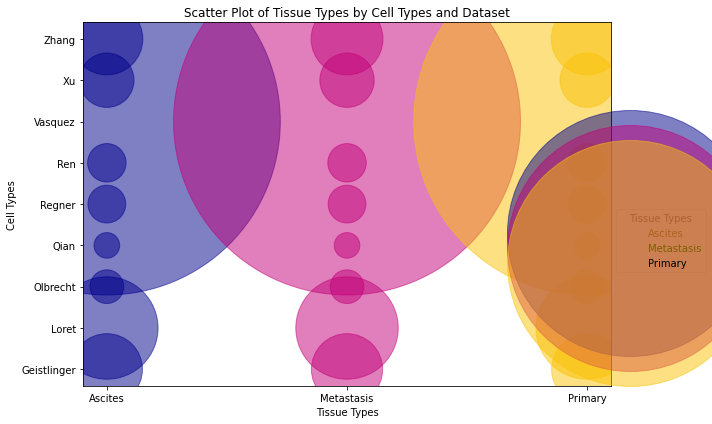

In [37]:
# Define colors for tissue types
tissue_colors = {'Ascites': '#00008B', 'Metastasis': '#C20078', 'Primary': '#FAC205'}

# Define marker sizes based on the number of cells (scaling factor applied)
scaling_factor = 0.05  # Adjust this as needed
marker_sizes = merged_df.sum(axis=1) * scaling_factor

# Create the scatter plot
fig, ax = plt.subplots(figsize=(10, 6))

for tissue, color in tissue_colors.items():
    ax.scatter([tissue] * len(merged_df.index), merged_df.index, s=marker_sizes, c=color, label=tissue, alpha=0.5)

# Customize the plot
ax.set_xlabel('Tissue Types')
ax.set_ylabel('Cell Types')
ax.set_title('Scatter Plot of Tissue Types by Cell Types and Dataset')
ax.legend(title='Tissue Types', loc='upper left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()


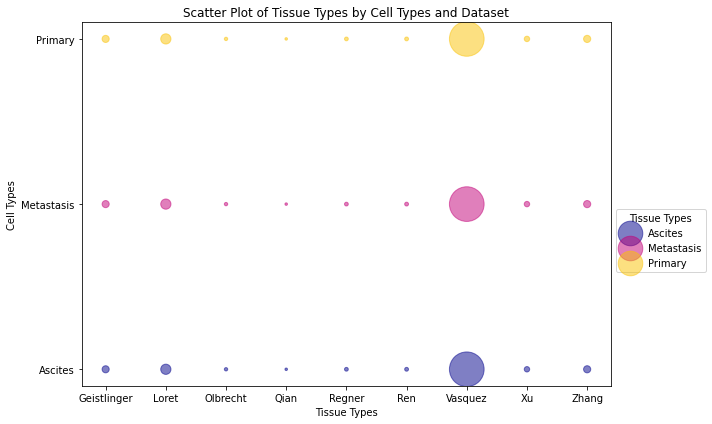

In [41]:
# Define colors for tissue types
tissue_colors = {'Ascites': '#00008B', 'Metastasis': '#C20078', 'Primary': '#FAC205'}

# Define marker sizes based on the number of cells (scaling factor applied)
scaling_factor = 0.0005  # Adjust this as needed
marker_sizes = merged_df.sum(axis=1) * scaling_factor

# Create the scatter plot
fig, ax = plt.subplots(figsize=(10, 6))

for tissue, color in tissue_colors.items():
    ax.scatter(merged_df.index, [tissue] * len(merged_df.index), s=marker_sizes, c=color, label=tissue, alpha=0.5)

# Customize the plot
ax.set_xlabel('Tissue Types')
ax.set_ylabel('Cell Types')
ax.set_title('Scatter Plot of Tissue Types by Cell Types and Dataset')
ax.legend(title='Tissue Types', loc='upper left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()


<AxesSubplot:xlabel='x', ylabel='y'>

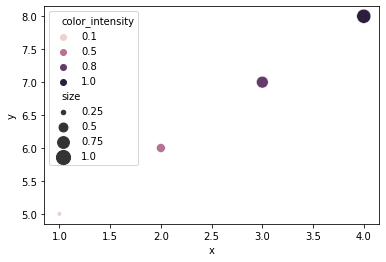

In [48]:
# Example DataFrame
data = {
    'x': [1, 2, 3, 4],
    'y': [5, 6, 7, 8],
    'size': [100, 200, 300, 400],  # Size of bubbles
    'color_intensity': [0.1, 0.5, 0.8, 1.0]  # Fourth dimension represented by color intensity
}

df = pd.DataFrame(data)

# Normalize data if needed
df['size'] = df['size'] / df['size'].max()

# Plotting
sns.scatterplot(data=df, x='x', y='y', size='size', hue='color_intensity', sizes=(20, 200))


In [49]:
df

,x,y,size,color_intensity
0,1,5,0.25,0.1
1,2,6,0.50,0.5
2,3,7,0.75,0.8
3,4,8,1.00,1.0


<AxesSubplot:xlabel='x', ylabel='y'>

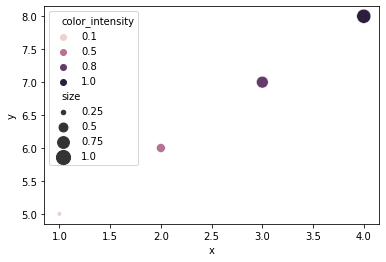

In [48]:
# Example DataFrame
data = {
    'dataset': ['Geistlinger', 'Loret', 'Olbrecht', 'Qian', 'Regner', 'Ren', 'Vasquez', 'Xu', 'Zhang'],
    'cell_types': ['CancerMSK', 'EndothelialMSK', 'FibroblastsMSK', 'HematopoieticMSK'],
    'num_of_cells': [],  # Size of bubbles
    'tissue_type': ['Primary', 'Ascites', 'Metastasis']  # Fourth dimension represented by color intensity
}

df = pd.DataFrame(data)

# Normalize data if needed
df['size'] = df['size'] / df['size'].max()

# Plotting
sns.scatterplot(data=df, x='x', y='y', size='size', hue='color_intensity', sizes=(20, 200))


In [64]:
# Extracting unique datasets, cell types, and tissue types
datasets = sorted(adata.obs['dataset'].unique())
cell_types = sorted(adata.obs['max'].unique())
tissue_types = sorted(adata.obs['tissue'].unique())

# Creating an empty DataFrame
df = pd.DataFrame(columns=['dataset', 'cell_types', 'num_of_cells', 'tissue_type'])

# Populating the DataFrame
for dataset in datasets:
    for cell_type in cell_types:
        for tissue_type in tissue_types:
            # Filtering data based on dataset, cell type, and tissue type
            filtered_data = adata.obs[(adata.obs['dataset'] == dataset) & 
                                      (adata.obs['max'] == cell_type) & 
                                      (adata.obs['tissue'] == tissue_type)]
            num_of_cells = len(filtered_data)  # Number of cells matching the criteria
            # Appending to DataFrame
            df = df.append({'dataset': dataset, 'cell_types': cell_type,
                            'num_of_cells': num_of_cells, 'tissue_type': tissue_type},
                           ignore_index=True)

# Optionally, you can sort the DataFrame
df = df.sort_values(by=['dataset', 'cell_types', 'tissue_type']).reset_index(drop=True)

# Printing the DataFrame
df

,dataset,cell_types,num_of_cells,tissue_type
0,Geistlinger,CancerMSK,0,Ascites
1,Geistlinger,CancerMSK,18071,Metastasis
2,Geistlinger,CancerMSK,0,Primary
3,Geistlinger,EndothelialMSK,0,Ascites
4,Geistlinger,EndothelialMSK,5018,Metastasis
...,...,...,...,...
103,Zhang,FibroblastsMSK,9577,Metastasis
104,Zhang,FibroblastsMSK,0,Primary
105,Zhang,HematopoieticMSK,0,Ascites
106,Zhang,HematopoieticMSK,17439,Metastasis


In [65]:
print(df)

         dataset        cell_types num_of_cells tissue_type
0    Geistlinger         CancerMSK            0     Ascites
1    Geistlinger         CancerMSK        18071  Metastasis
2    Geistlinger         CancerMSK            0     Primary
3    Geistlinger    EndothelialMSK            0     Ascites
4    Geistlinger    EndothelialMSK         5018  Metastasis
..           ...               ...          ...         ...
103        Zhang    FibroblastsMSK         9577  Metastasis
104        Zhang    FibroblastsMSK            0     Primary
105        Zhang  HematopoieticMSK            0     Ascites
106        Zhang  HematopoieticMSK        17439  Metastasis
107        Zhang  HematopoieticMSK            0     Primary

[108 rows x 4 columns]


<ipython-input-60-1c90e4cc1d1d>:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


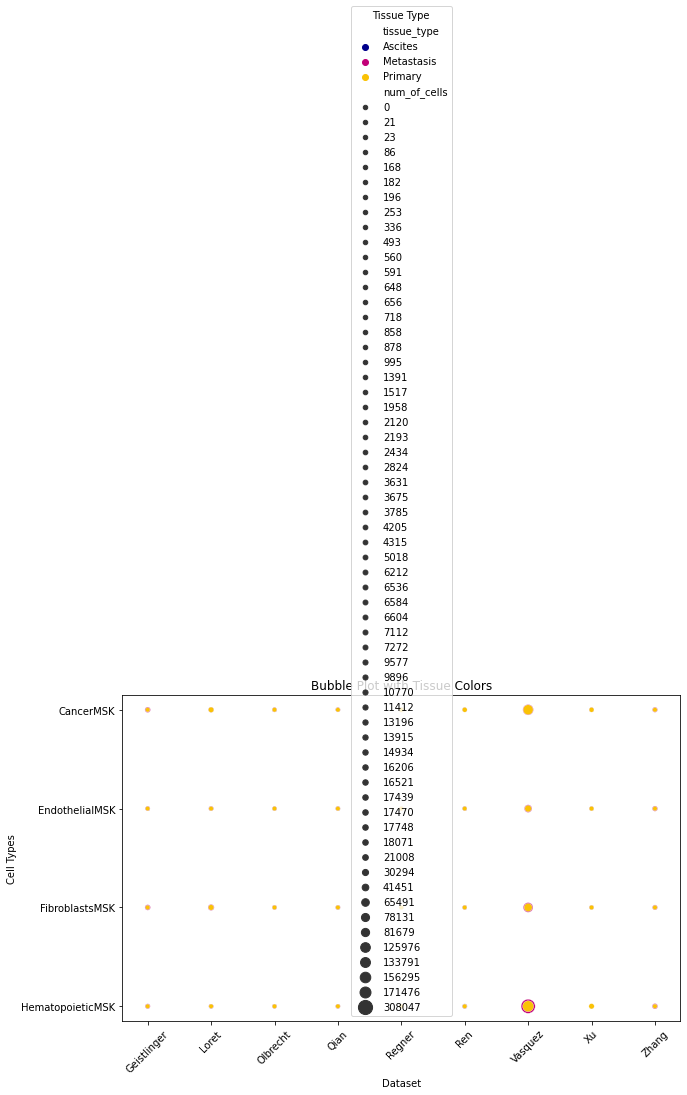

In [60]:
# Tissue colors
tissue_colors = {'Ascites': '#00008B', 'Metastasis': '#C20078', 'Primary': '#FAC205'}

# Normalize data if needed
#df['num_of_cells'] = df['num_of_cells'] / df['num_of_cells'].max()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='dataset', y='cell_types', size='num_of_cells', hue='tissue_type', sizes=(20, 200),
                palette=tissue_colors, legend='full')
plt.title('Bubble Plot with Tissue Colors')
plt.xlabel('Dataset')
plt.ylabel('Cell Types')
plt.legend(title='Tissue Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

<ipython-input-67-744ebb48d4f2>:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


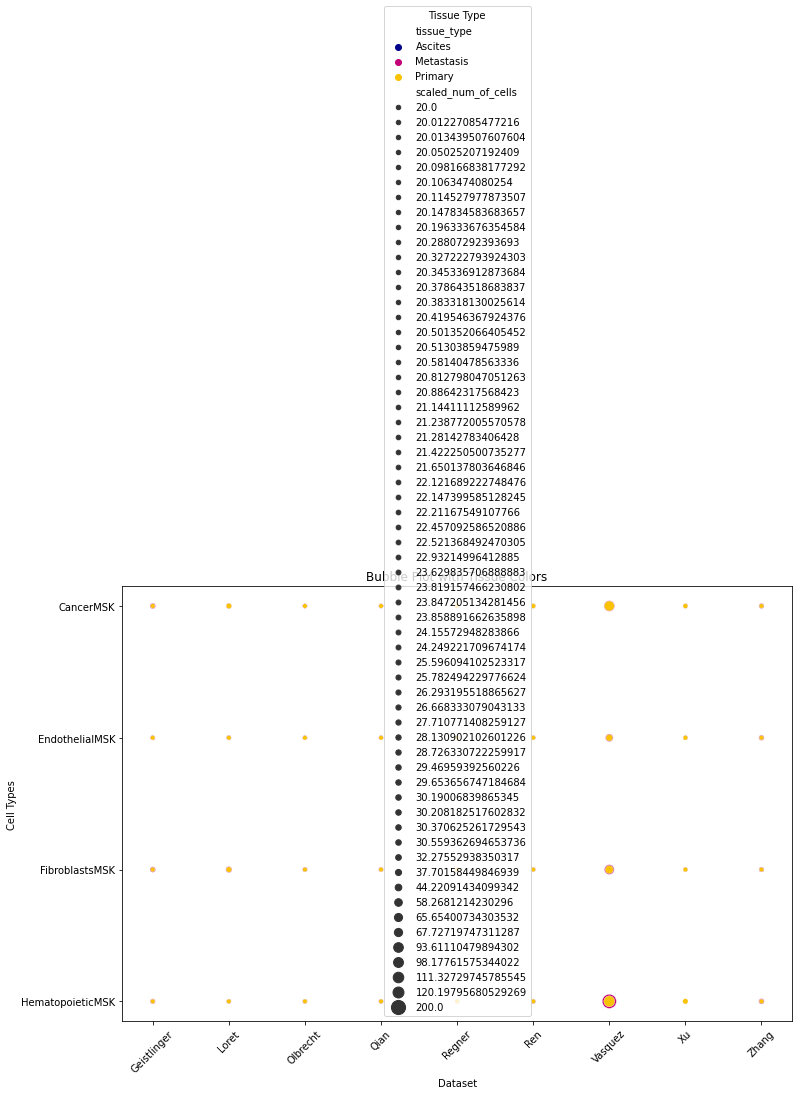

In [67]:
from sklearn.preprocessing import MinMaxScaler

# Creating a MinMaxScaler object
scaler = MinMaxScaler(feature_range=(20, 200))  # Range of bubble sizes

# Scaling 'num_of_cells' values
df['scaled_num_of_cells'] = scaler.fit_transform(df[['num_of_cells']])

# Tissue colors
tissue_colors = {'Ascites': '#00008B', 'Metastasis': '#C20078', 'Primary': '#FAC205'}

# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='dataset', y='cell_types', size='scaled_num_of_cells', hue='tissue_type', sizes=(20, 200),
                palette=tissue_colors, legend='full')
plt.title('Bubble Plot with Tissue Colors')
plt.xlabel('Dataset')
plt.ylabel('Cell Types')
plt.legend(title='Tissue Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [ ]:
adata = sc.datasets.pbmc68k_reduced()
markers = ['C1QA', 'PSAP', 'CD79A', 'CD79B', 'CST3', 'LYZ']
sc.pl.matrixplot(adata, markers, groupby='bulk_labels', dendrogram=True)

In [70]:
markers = {'Cancer':['WFDC2','CLDN3','KRT7','KRT8','KRT17','KRT18','KRT19','EPCAM','WT1','CLDN4','MSLN','FOLR1','MUC1'],
          'Fibroblast':['COL1A1','COL3A1','WT1','ACTA2','CAV1','COL1A2','DCN','SPARC','COL6A1','CCDC80','LUM','COL6A2','COL6A3','CALD1','RARRES2','MGP','CTHRC1','AEBP1','POSTN','COL5A2','FBLN1','TAGLN','C1S','C1R','NNMT','MMP2','IGFBP5','TIMP1','FN1','IGFBP7','C3','COL5A1','LGALS1'],
          'Endothelial':['CLEC14A','VWF','CAV1','EMCN','CDH5','IL3RA','IGFBP7','COL4A1','COL4A2','COL15A1','SPARCL1','A2M','HSPG2','PLVAP','AQP1','ENG','RAMP2','GNG11','EGFL7','CLDN5','INSR'],
          'Hematopoietic':['PTPRC']}

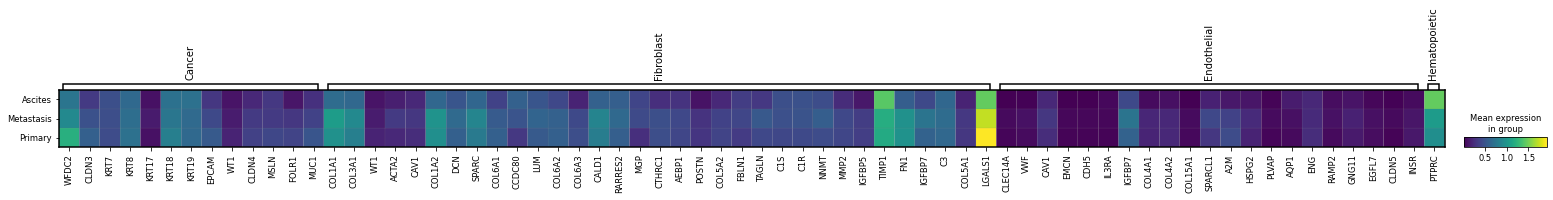

In [72]:
sc.pl.matrixplot(adata, markers, groupby='tissue', dendrogram=False)

In [75]:
def plot_clustered_stacked(dfall, labels=None, title="multiple stacked bar plot",  H="/", **kwargs):
    """Given a list of dataframes, with identical columns and index, create a clustered stacked bar plot. 
labels is a list of the names of the dataframe, used for the legend
title is a string for the title of the plot
H is the hatch used for identification of the different dataframe"""

    n_df = len(dfall)
    n_col = len(dfall[0].columns) 
    n_ind = len(dfall[0].index)
    axe = plt.subplot(111)

    for df in dfall : # for each data frame
        axe = df.plot(kind="bar",
                      linewidth=0,
                      stacked=True,
                      ax=axe,
                      legend=False,
                      grid=False,
                      **kwargs)  # make bar plots

    h,l = axe.get_legend_handles_labels() # get the handles we want to modify
    for i in range(0, n_df * n_col, n_col): # len(h) = n_col * n_df
        for j, pa in enumerate(h[i:i+n_col]):
            for rect in pa.patches: # for each index
                rect.set_x(rect.get_x() + 1 / float(n_df + 1) * i / float(n_col))
                rect.set_hatch(H * int(i / n_col)) #edited part     
                rect.set_width(1 / float(n_df + 1))

    axe.set_xticks((np.arange(0, 2 * n_ind, 2) + 1 / float(n_df + 1)) / 2.)
    axe.set_xticklabels(df.index, rotation = 0)
    axe.set_title(title)

    # Add invisible data to add another legend
    n=[]        
    for i in range(n_df):
        n.append(axe.bar(0, 0, color="gray", hatch=H * i))

    l1 = axe.legend(h[:n_col], l[:n_col], loc=[1.01, 0.5])
    if labels is not None:
        l2 = plt.legend(n, labels, loc=[1.01, 0.1]) 
    axe.add_artist(l1)
    return axe

<AxesSubplot:title={'center':'multiple stacked bar plot'}, xlabel='dataset'>

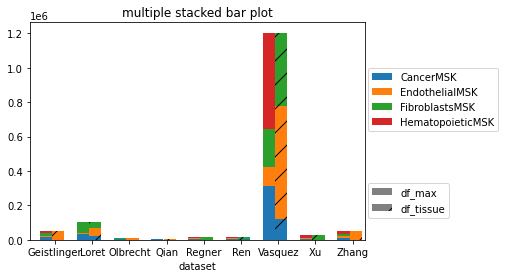

In [76]:
# create fake dataframes
df_max = pd.crosstab(adata.obs['dataset'], adata.obs['max'])
df_max

df_tissue = pd.crosstab(adata.obs['dataset'], adata.obs['tissue'])
df_tissue

# Then, just call :
plot_clustered_stacked([df_max, df_tissue],["df_max", "df_tissue"])

In [89]:
df1 = pd.DataFrame(np.random.rand(4, 5),
                   index=["A", "B", "C", "D"],
                   columns=["I", "J", "K", "L", "M"])
df2 = pd.DataFrame(np.random.rand(4, 5),
                   index=["A", "B", "C", "D"],
                   columns=["I", "J", "K", "L", "M"])

In [98]:
df1

,I,J,K,L,M,Name
A,0.194555,0.553256,0.953932,0.443491,0.850235,df1
B,0.712294,0.240262,0.372384,0.771242,0.917281,df1
C,0.275111,0.635944,0.426667,0.232675,0.375892,df1
D,0.191881,0.727651,0.896888,0.170703,0.042021,df1


In [94]:
df1.index

Index(['A', 'B', 'C', 'D'], dtype='object')

In [90]:
df1["Name"] = "df1"
df2["Name"] = "df2"

dfall = pd.concat([pd.melt(i.reset_index(),
                           id_vars=["Name", "index"]) # transform in tidy format each df
                   for i in [df1, df2]],
                   ignore_index=True)

In [110]:
df1

,I,J,K,L,M,Name
A,0.194555,0.553256,0.953932,0.443491,0.850235,df1
B,0.712294,0.240262,0.372384,0.771242,0.917281,df1
C,0.275111,0.635944,0.426667,0.232675,0.375892,df1
D,0.191881,0.727651,0.896888,0.170703,0.042021,df1


In [91]:
dfall

,Name,index,variable,value
0,df1,A,I,0.194555
1,df1,B,I,0.712294
2,df1,C,I,0.275111
3,df1,D,I,0.191881
4,df1,A,J,0.553256
5,df1,B,J,0.240262
6,df1,C,J,0.635944
7,df1,D,J,0.727651
8,df1,A,K,0.953932
9,df1,B,K,0.372384


In [114]:
df_max = pd.crosstab(adata.obs['dataset'], adata.obs['max'])
df_max

df_tissue = pd.crosstab(adata.obs['dataset'], adata.obs['tissue'])
df_tissue

tissue,Ascites,Metastasis,Primary
dataset,,,
Geistlinger,0,50733,0
Loret,23086,47538,34347
Olbrecht,0,9641,1743
Qian,0,6578,0
Regner,0,0,14289
Ren,7364,0,7429
Vasquez,123155,655809,424849
Xu,0,0,29580
Zhang,0,51701,0


In [115]:
df_tissue.columns

CategoricalIndex(['Ascites', 'Metastasis', 'Primary'], categories=['Ascites', 'Metastasis', 'Primary'], ordered=False, dtype='category', name='tissue')

In [116]:
df_tissue.index

CategoricalIndex(['Geistlinger', 'Loret', 'Olbrecht', 'Qian', 'Regner', 'Ren',
                  'Vasquez', 'Xu', 'Zhang'],
                 categories=['Geistlinger', 'Loret', 'Olbrecht', 'Qian', 'Regner', 'Ren', 'Vasquez', 'Xu', ...], ordered=False, dtype='category', name='dataset')

In [122]:
df_tissue = df_tissue.reset_index()

In [124]:
df_tissue.columns

Index(['dataset', 'Ascites', 'Metastasis', 'Primary'], dtype='object', name='tissue')

In [125]:
df_tissue

tissue,dataset,Ascites,Metastasis,Primary
0,Geistlinger,0,50733,0
1,Loret,23086,47538,34347
2,Olbrecht,0,9641,1743
3,Qian,0,6578,0
4,Regner,0,0,14289
5,Ren,7364,0,7429
6,Vasquez,123155,655809,424849
7,Xu,0,0,29580
8,Zhang,0,51701,0


In [126]:
df_tissue.index

RangeIndex(start=0, stop=9, step=1)

In [127]:
df_tissue = df_tissue.set_index('dataset')

In [128]:
df_tissue

tissue,Ascites,Metastasis,Primary
dataset,,,
Geistlinger,0,50733,0
Loret,23086,47538,34347
Olbrecht,0,9641,1743
Qian,0,6578,0
Regner,0,0,14289
Ren,7364,0,7429
Vasquez,123155,655809,424849
Xu,0,0,29580
Zhang,0,51701,0


In [129]:
df_tissue.index

CategoricalIndex(['Geistlinger', 'Loret', 'Olbrecht', 'Qian', 'Regner', 'Ren',
                  'Vasquez', 'Xu', 'Zhang'],
                 categories=['Geistlinger', 'Loret', 'Olbrecht', 'Qian', 'Regner', 'Ren', 'Vasquez', 'Xu', ...], ordered=False, dtype='category', name='dataset')

In [131]:
df_max["name"] = "cell types"
df_max = df_max.reset_index()
df_max = df_max.set_index('dataset')
df_max.index = df_max.index.astype('object')
df_tissue["name"] = "tissue types"
df_tissue = df_tissue.reset_index()
df_tissue = df_tissue.set_index('dataset')
df_tissue.index = df_tissue.index.astype('object')


dfall = pd.concat([pd.melt(i.reset_index(),
                           id_vars=["name", "dataset"]) # transform in tidy format each df
                   for i in [df_max, df_tissue]],
                   ignore_index=True)
dfall

,name,dataset,max,value,tissue
0,cell types,Geistlinger,CancerMSK,18071,NaN
1,cell types,Loret,CancerMSK,34730,NaN
2,cell types,Olbrecht,CancerMSK,4503,NaN
3,cell types,Qian,CancerMSK,2193,NaN
4,cell types,Regner,CancerMSK,6536,NaN
...,...,...,...,...,...
58,tissue types,Regner,NaN,14289,Primary
59,tissue types,Ren,NaN,7429,Primary
60,tissue types,Vasquez,NaN,424849,Primary
61,tissue types,Xu,NaN,29580,Primary


In [134]:
dfall.set_index(["name", "dataset", "max"], inplace=True)
dfall["vcs"] = dfall.groupby(level=["name", "dataset"]).cumsum()
dfall.reset_index(inplace=True)
dfall

,name,dataset,max,value,tissue,vcs
0,cell types,Geistlinger,CancerMSK,18071,NaN,18071
1,cell types,Loret,CancerMSK,34730,NaN,34730
2,cell types,Olbrecht,CancerMSK,4503,NaN,4503
3,cell types,Qian,CancerMSK,2193,NaN,2193
4,cell types,Regner,CancerMSK,6536,NaN,6536
...,...,...,...,...,...,...
58,tissue types,Regner,NaN,14289,Primary,14289
59,tissue types,Ren,NaN,7429,Primary,14793
60,tissue types,Vasquez,NaN,424849,Primary,1203813
61,tissue types,Xu,NaN,29580,Primary,29580


1. In adata select only geistlinger
2. crosstab tissue per cell type
3. plot bubble with bubble sizes as percentages

In [5]:
adata_g = adata[adata.obs.dataset == 'Geistlinger']

In [6]:
adata_g

View of AnnData object with n_obs × n_vars = 50733 × 17063
    obs: 'tissue', 'developmental_stage', 'treatment', 'recurrence', 'tumor_stage', 'paper_ID', 'anatomical_location', 'dataset', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'CancerMSK', 'EndothelialMSK', 'FibroblastsMSK', 'HematopoieticMSK', 'max', 'cell_types'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'

In [7]:
adata_g.obs

,tissue,developmental_stage,treatment,recurrence,tumor_stage,paper_ID,anatomical_location,dataset,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,CancerMSK,EndothelialMSK,FibroblastsMSK,HematopoieticMSK,max,cell_types
AAACCTGAGACTTGAA-1-T59,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,Geistlinger,599,599,1302.0,122.0,9.370199,0.573949,0.271034,0.150646,-0.859225,CancerMSK,CancerMSK
AAACCTGAGAGACGAA-1-T59,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,Geistlinger,1198,1198,2977.0,153.0,5.139402,-0.106276,0.598902,1.259536,-1.528241,FibroblastsMSK,vCAF
AAACCTGAGAGTACCG-1-T59,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,Geistlinger,1232,1232,3502.0,203.0,5.796688,0.050084,-0.097049,0.215650,0.589760,HematopoieticMSK,Myeloid_cells
AAACCTGAGTCATCCA-1-T59,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,Geistlinger,550,550,1186.0,66.0,5.564924,0.022695,0.295592,0.405196,-0.798307,FibroblastsMSK,mCAF
AAACCTGAGTGCGATG-1-T59,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,Geistlinger,824,824,2041.0,131.0,6.418423,-0.270711,-0.034378,0.733112,0.627006,FibroblastsMSK,vCAF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTCGCATCG-1-T90,Metastasis,Advanced stage,CHT,Sensitive,IVA,Geistlinger_90,Omentum,Geistlinger,1650,1650,6118.0,157.0,2.566198,-0.188526,-0.033256,1.224092,-1.321510,FibroblastsMSK,iCAF
TTTGTCAGTCGCCATG-1-T90,Metastasis,Advanced stage,CHT,Sensitive,IVA,Geistlinger_90,Omentum,Geistlinger,510,510,1813.0,58.0,3.199118,-0.355915,-0.153257,-0.313506,0.892377,HematopoieticMSK,T_CD4_naive
TTTGTCAGTGAAAGAG-1-T90,Metastasis,Advanced stage,CHT,Sensitive,IVA,Geistlinger_90,Omentum,Geistlinger,565,565,1877.0,73.0,3.889185,-0.331119,-0.159158,-0.204206,-0.952287,EndothelialMSK,EndothelialMSK
TTTGTCATCAAGAAGT-1-T90,Metastasis,Advanced stage,CHT,Sensitive,IVA,Geistlinger_90,Omentum,Geistlinger,458,458,1887.0,19.0,1.006889,-0.113502,-0.028154,-0.115391,-1.021895,EndothelialMSK,EndothelialMSK


In [8]:
g = pd.crosstab(adata_g.obs['max'], adata_g.obs['tissue'])
g

tissue,Metastasis
max,
CancerMSK,18071
EndothelialMSK,5018
FibroblastsMSK,17748
HematopoieticMSK,9896


In [9]:
adata_l = adata[adata.obs.dataset == 'Loret']

In [10]:
adata_l

View of AnnData object with n_obs × n_vars = 104971 × 17063
    obs: 'tissue', 'developmental_stage', 'treatment', 'recurrence', 'tumor_stage', 'paper_ID', 'anatomical_location', 'dataset', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'CancerMSK', 'EndothelialMSK', 'FibroblastsMSK', 'HematopoieticMSK', 'max', 'cell_types'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'

In [11]:
adata_l.obs

,tissue,developmental_stage,treatment,recurrence,tumor_stage,paper_ID,anatomical_location,dataset,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,CancerMSK,EndothelialMSK,FibroblastsMSK,HematopoieticMSK,max,cell_types
AAACCTGAGAAACGCC-1-sample_1,Primary,Advanced stage,Naive,Recurrence,IIIC,Loret_1,Ovary,Loret,1854,1854,5754.0,15.0,0.260688,-0.504075,0.176258,2.054413,-1.392691,FibroblastsMSK,mCAF
AAACCTGAGAAGGGTA-1-sample_1,Primary,Advanced stage,Naive,Recurrence,IIIC,Loret_1,Ovary,Loret,3030,3030,11113.0,48.0,0.431927,1.230136,-0.286177,-0.021810,-1.480439,CancerMSK,CancerMSK
AAACCTGAGAGGTAGA-1-sample_1,Primary,Advanced stage,Naive,Recurrence,IIIC,Loret_1,Ovary,Loret,2392,2392,10054.0,160.0,1.591406,-0.442151,0.039736,2.180110,-1.232469,FibroblastsMSK,mCAF
AAACCTGAGAGTACCG-1-sample_1,Primary,Advanced stage,Naive,Recurrence,IIIC,Loret_1,Ovary,Loret,1374,1374,4260.0,34.0,0.798122,-0.303956,0.002539,2.073100,-1.314994,FibroblastsMSK,mCAF
AAACCTGAGCTAGCCC-1-sample_1,Primary,Advanced stage,Naive,Recurrence,IIIC,Loret_1,Ovary,Loret,901,901,2347.0,120.0,5.112910,0.203283,0.021329,2.542644,-0.943005,FibroblastsMSK,mCAF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGCGCAGGCGCTCT-1-sample_22,Metastasis,Advanced stage,NACT,Recurrence,IIIB,Loret_3,Peritoneum,Loret,2642,2642,10452.0,372.0,3.559127,1.923863,-0.289796,-0.149153,-1.603571,CancerMSK,CancerMSK
TTTGGTTAGTAACCCT-1-sample_22,Metastasis,Advanced stage,NACT,Recurrence,IIIB,Loret_3,Peritoneum,Loret,1747,1747,5442.0,116.0,2.131569,-0.127610,0.107055,1.684511,-1.274475,FibroblastsMSK,starCAF
TTTGGTTGTACAGTTC-1-sample_22,Metastasis,Advanced stage,NACT,Recurrence,IIIB,Loret_3,Peritoneum,Loret,3360,3360,14892.0,262.0,1.759334,1.782493,-0.313293,-0.281609,-1.643469,CancerMSK,CancerMSK
TTTGGTTGTAGAGTGC-1-sample_22,Metastasis,Advanced stage,NACT,Recurrence,IIIB,Loret_3,Peritoneum,Loret,881,881,2113.0,472.0,22.337908,1.294342,-0.211108,-0.213928,-1.006636,CancerMSK,CancerMSK


In [21]:
l = pd.crosstab(adata_l.obs['max'], adata_l.obs['tissue'])
l

tissue,Ascites,Metastasis,Primary
max,,,
CancerMSK,7112,11412,16206
EndothelialMSK,858,4315,648
FibroblastsMSK,14934,30294,17470
HematopoieticMSK,182,1517,23


In [19]:
l = l.reset_index()
l = l.set_index('max')
l.index = l.index.astype('object')

IndexError: list index out of range

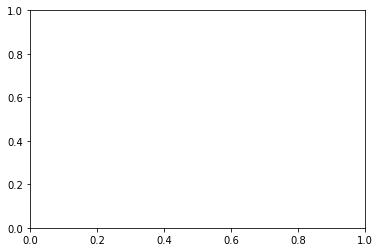

In [22]:
# Define the size values (0, 25, 50, 75, 100)
sizes = [0, 25, 50, 75, 100]

# Plotting
fig, ax = plt.subplots()

# Iterate through each row of the DataFrame
for i, row in l.iterrows():
    # Scatter plot with bubble sizes scaled
    ax.scatter(row.index, [i]*len(row), s=[sizes[idx] for idx in row], label=i)

# Add legend
ax.legend(title='Tissue')

# Set labels and title
ax.set_xlabel('Cell Type')
ax.set_ylabel('Tissue')
ax.set_title('Bubble Chart with Scaled Sizes')

plt.show()

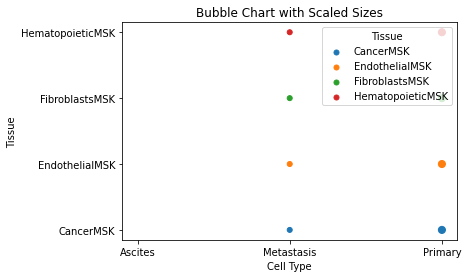

In [23]:

# Sample data
data = {
    'Tissue': ['CancerMSK', 'EndothelialMSK', 'FibroblastsMSK', 'HematopoieticMSK'],
    'Ascites': [7112, 858, 14934, 182],
    'Metastasis': [11412, 4315, 30294, 1517],
    'Primary': [16206, 648, 17470, 23]
}

# Create DataFrame
tissue = pd.DataFrame(data)
tissue.set_index('Tissue', inplace=True)

# Define the size values (0, 25, 50, 75, 100)
sizes = [0, 25, 50, 75, 100]

# Plotting
fig, ax = plt.subplots()

# Iterate through each row of the DataFrame
for i, row in tissue.iterrows():
    # Scatter plot with bubble sizes scaled
    ax.scatter(row.index, [i]*len(row), s=[sizes[idx] for idx in range(len(row))], label=i)

# Add legend
ax.legend(title='Tissue')

# Set labels and title
ax.set_xlabel('Cell Type')
ax.set_ylabel('Tissue')
ax.set_title('Bubble Chart with Scaled Sizes')

plt.show()

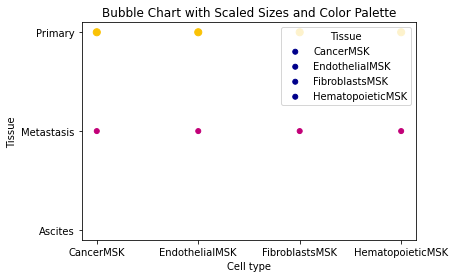

In [27]:
# Sample data
data = {
    'Tissue': ['CancerMSK', 'EndothelialMSK', 'FibroblastsMSK', 'HematopoieticMSK'],
    'Ascites': [7112, 858, 14934, 182],
    'Metastasis': [11412, 4315, 30294, 1517],
    'Primary': [16206, 648, 17470, 23]
}

# Create DataFrame
tissue = pd.DataFrame(data)
tissue.set_index('Tissue', inplace=True)

# Define the size values (0, 25, 50, 75, 100)
sizes = [0, 25, 50, 75, 100]

# Define color palettes
palette_tissue = {'Metastasis':'#C20078', 'Ascites':'#00008B', 'Primary':'#FAC205'}
palette_max = {'HematopoieticMSK':'#9addfb', 'CancerMSK':'#F4BBC9', 'FibroblastsMSK':'#B3E6B5', 'EndothelialMSK':'#FC5A50'}

# Plotting
fig, ax = plt.subplots()

# Iterate through each row of the DataFrame
for i, row in tissue.iterrows():
    # Scatter plot with bubble sizes scaled and colors based on tissue
    ax.scatter([i]*len(row), row.index, s=[sizes[idx] for idx in range(len(row))], 
               color=[palette_tissue.get(col, 'black') for col in row.index], label=i)

# Add legend
ax.legend(title='Tissue')

# Set labels and title
ax.set_xlabel('Cell type')
ax.set_ylabel('Tissue')
ax.set_title('Bubble Chart with Scaled Sizes and Color Palette')

plt.show()

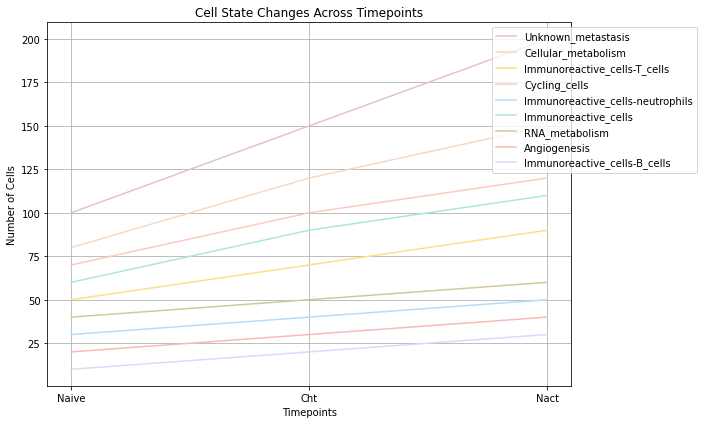

In [29]:
import matplotlib.pyplot as plt

# Define the cell states and their colors
colors = {
    'Unknown_metastasis': '#E5BEDD',
    'Cellular_metabolism': '#F7D8C2',
    'Immunoreactive_cells-T_cells': '#FAE087',
    'Cycling_cells': '#FFC8C2',
    'Immunoreactive_cells-neutrophils': '#B5DCF9',
    'Immunoreactive_cells': '#A9E6E3',
    'RNA_metabolism': '#D2C897',
    'Angiogenesis': '#FEB8B8',
    'Immunoreactive_cells-B_cells': '#DBD9F7'
}

# Sample data: counts of cells for each state at each timepoint
# Replace this with your actual data
timepoints = ['Naive', 'Cht', 'Nact']
cell_counts = {
    'Unknown_metastasis': [100, 150, 200],
    'Cellular_metabolism': [80, 120, 150],
    'Immunoreactive_cells-T_cells': [50, 70, 90],
    'Cycling_cells': [70, 100, 120],
    'Immunoreactive_cells-neutrophils': [30, 40, 50],
    'Immunoreactive_cells': [60, 90, 110],
    'RNA_metabolism': [40, 50, 60],
    'Angiogenesis': [20, 30, 40],
    'Immunoreactive_cells-B_cells': [10, 20, 30]
}

# Plotting the line plot
plt.figure(figsize=(10, 6))
for state, color in colors.items():
    plt.plot(timepoints, cell_counts[state], label=state, color=color)

plt.xlabel('Timepoints')
plt.ylabel('Number of Cells')
plt.title('Cell State Changes Across Timepoints')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


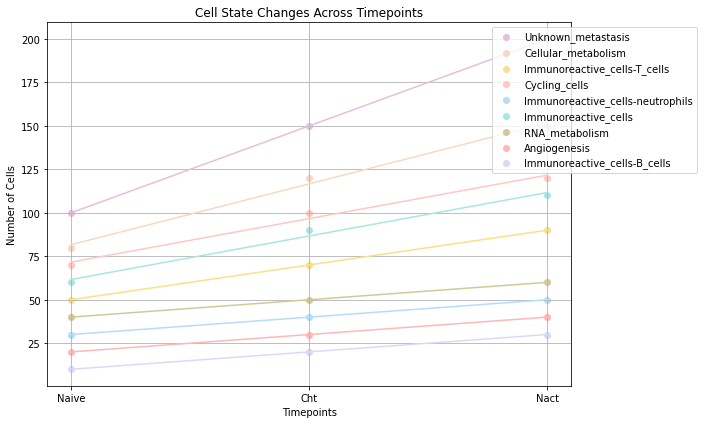

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Define the cell states and their colors
colors = {
    'Unknown_metastasis': '#E5BEDD',
    'Cellular_metabolism': '#F7D8C2',
    'Immunoreactive_cells-T_cells': '#FAE087',
    'Cycling_cells': '#FFC8C2',
    'Immunoreactive_cells-neutrophils': '#B5DCF9',
    'Immunoreactive_cells': '#A9E6E3',
    'RNA_metabolism': '#D2C897',
    'Angiogenesis': '#FEB8B8',
    'Immunoreactive_cells-B_cells': '#DBD9F7'
}

# Sample data: counts of cells for each state at each timepoint
# Replace this with your actual data
timepoints = ['Naive', 'Cht', 'Nact']
cell_counts = {
    'Unknown_metastasis': [100, 150, 200],
    'Cellular_metabolism': [80, 120, 150],
    'Immunoreactive_cells-T_cells': [50, 70, 90],
    'Cycling_cells': [70, 100, 120],
    'Immunoreactive_cells-neutrophils': [30, 40, 50],
    'Immunoreactive_cells': [60, 90, 110],
    'RNA_metabolism': [40, 50, 60],
    'Angiogenesis': [20, 30, 40],
    'Immunoreactive_cells-B_cells': [10, 20, 30]
}

# Plotting the scatter plot with regression lines
plt.figure(figsize=(10, 6))
for state, color in colors.items():
    x = np.arange(len(timepoints)).reshape(-1, 1)
    y = cell_counts[state]
    
    # Fit linear regression
    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)
    
    # Plot scatter points
    plt.scatter(timepoints, y, label=state, color=color)
    
    # Plot regression line
    plt.plot(timepoints, y_pred, color=color)

plt.xlabel('Timepoints')
plt.ylabel('Number of Cells')
plt.title('Cell State Changes Across Timepoints')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.grid(True)
plt.tight_layout()
plt.show()
